In [2]:
import numpy as np

In [3]:
np.average?

Signature: np.average(a, axis=None, weights=None, returned=False)
Docstring:
Compute the weighted average along the specified axis.

Parameters
----------
a : array_like
    Array containing data to be averaged. If `a` is not an array, a
    conversion is attempted.
axis : None or int or tuple of ints, optional
    Axis or axes along which to average `a`.  The default,
    axis=None, will average over all of the elements of the input array.
    If axis is negative it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If axis is a tuple of ints, averaging is performed on all of the axes
    specified in the tuple instead of a single axis or all the axes as
    before.
weights : array_like, optional
    An array of weights associated with the values in `a`. Each value in
    `a` contributes to the average according to its associated weight.
    The weights array can either be 1-D (in which case its length must be
    the size of `a` along the given axis) or of the 

In [1]:
import numpy as np

def surface_curvature(X,Y,Z):

	(lr,lb)=X.shape

	#print(lr)
	#print("awfshss-------------")
	#print(lb)
#First Derivatives
	Xv,Xu=np.gradient(X)
	Yv,Yu=np.gradient(Y)
	Zv,Zu=np.gradient(Z)
    #print(Xv)
    #print(Xu)

#Second Derivatives
	Xuv,Xuu=np.gradient(Xu)
	Yuv,Yuu=np.gradient(Yu)
	Zuv,Zuu=np.gradient(Zu)   

	Xvv,Xuv=np.gradient(Xv)
	Yvv,Yuv=np.gradient(Yv)
	Zvv,Zuv=np.gradient(Zv) 

#2D to 1D conversion 
#Reshape to 1D vectors
	Xu=np.reshape(Xu,lr*lb)
	Yu=np.reshape(Yu,lr*lb)
	Zu=np.reshape(Zu,lr*lb)
	Xv=np.reshape(Xv,lr*lb)
	Yv=np.reshape(Yv,lr*lb)
	Zv=np.reshape(Zv,lr*lb)
	Xuu=np.reshape(Xuu,lr*lb)
	Yuu=np.reshape(Yuu,lr*lb)
	Zuu=np.reshape(Zuu,lr*lb)
	Xuv=np.reshape(Xuv,lr*lb)
	Yuv=np.reshape(Yuv,lr*lb)
	Zuv=np.reshape(Zuv,lr*lb)
	Xvv=np.reshape(Xvv,lr*lb)
	Yvv=np.reshape(Yvv,lr*lb)
	Zvv=np.reshape(Zvv,lr*lb)

	Xu=np.c_[Xu, Yu, Zu]
	Xv=np.c_[Xv, Yv, Zv]
	Xuu=np.c_[Xuu, Yuu, Zuu]
	Xuv=np.c_[Xuv, Yuv, Zuv]
	Xvv=np.c_[Xvv, Yvv, Zvv]

#% First fundamental Coeffecients of the surface (E,F,G)
	
	E=np.einsum('ij,ij->i', Xu, Xu) 
	F=np.einsum('ij,ij->i', Xu, Xv) 
	G=np.einsum('ij,ij->i', Xv, Xv) 

	m=np.cross(Xu,Xv,axisa=1, axisb=1) 
	p=np.sqrt(np.einsum('ij,ij->i', m, m)) 
	n=m/np.c_[p,p,p]
# n is the normal
#% Second fundamental Coeffecients of the surface (L,M,N), (e,f,g)
	L= np.einsum('ij,ij->i', Xuu, n) #e
	M= np.einsum('ij,ij->i', Xuv, n) #f
	N= np.einsum('ij,ij->i', Xvv, n) #g

# Alternative formula for gaussian curvature in wiki 
# K = det(second fundamental) / det(first fundamental)
#% Gaussian Curvature
	K=(L*N-M**2)/(E*G-F**2)
	K=np.reshape(K,lr*lb)
#	print(K.size)
#wiki trace of (second fundamental)(first fundamental inverse)
#% Mean Curvature
	H = ((E*N + G*L - 2*F*M)/((E*G - F**2)))/2
	#print(H.shape)
	H = np.reshape(H,lr*lb)
#	print(H.size)

#% Principle Curvatures
	Pmax = H + np.sqrt(H**2 - K)
	Pmin = H - np.sqrt(H**2 - K)
#[Pmax, Pmin]
	Principle = [Pmax,Pmin]
	return Principle

x.shape(3, 3)
y.shape(3, 3)
z.shape(3, 3)
x: [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
y: [[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
z: [[ 1.  1.  1.]
 [-1.  0.  1.]
 [-1.  1.  3.]]
maximum curvatures
[0.24966037 0.70710678 1.61803399 0.89407526 0.96592583 0.33333333
 0.5236068  0.20412415 0.06867044]
minimum curvatures
[-0.16021766 -0.35355339 -0.61803399 -0.1242749  -0.25881905 -0.33333333
 -0.0763932  -0.13608276 -0.17978155]


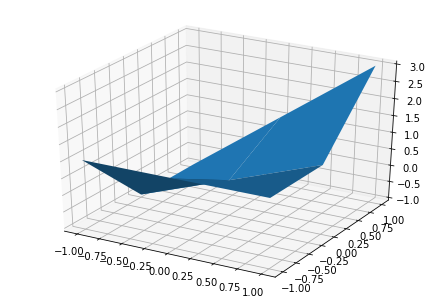

In [2]:
import scipy.ndimage as nd
import pylab
from mpl_toolkits.mplot3d import Axes3D
#s = nd.gaussian_filter(z,10)
x = np.linspace(-1,1,3)
y = np.linspace(-1,1,3)
[x,y]=np.meshgrid(x,y)
z = (x**3 +y**2 +x*y)
temp1 = surface_curvature(x, y, z)
# temp1 = surface_curvature(ndownpcd[:, 0].reshape(ndownpcd[0], 3), ndownpcd[:, 1].reshape(ndownpcd[0], 3), ndownpcd[:, 2].reshape(ndownpcd[0], 3))
print("maximum curvatures")
print(temp1[0])
print("minimum curvatures")
print(temp1[1])
fig = pylab.figure()
ax = Axes3D(fig)

# ax.plot_surface(ndownpcd[:, 0], ndownpcd[:, 1], ndownpcd[:, 2])
ax.plot_surface(x,y,z)
pylab.show()

In [6]:
x = np.linspace(-1,1,4)
x

array([-1.        , -0.33333333,  0.33333333,  1.        ])

In [7]:
np.gradient(x)

array([0.66666667, 0.66666667, 0.66666667, 0.66666667])

In [14]:
f = np.array([1, 2, 4, 7, 11, 16] )
np.gradient(f)

array([1. , 1.5, 2.5, 3.5, 4.5, 5. ])

In [18]:
arr1 = np.array(range(5))
print(arr1)
print(np.gradient(arr1))


[ 1  2  4  7 11 16]
[1.  1.5 2.5 3.5 4.5 5. ]


In [19]:
arr2 = np.random.randint(1, 9, (3,4))
arr2

array([[6, 6, 8, 7],
       [4, 6, 6, 1],
       [6, 2, 4, 1]])

In [20]:
np.gradient(arr2)

[array([[-2.,  0., -2., -6.],
        [ 0., -2., -2., -3.],
        [ 2., -4., -2.,  0.]]),
 array([[ 0. ,  1. ,  0.5, -1. ],
        [ 2. ,  1. , -2.5, -5. ],
        [-4. , -1. , -0.5, -3. ]])]